Monte Karlo užduotis
Sugeneruokite pseudoatsitiktinių skaičių sekas naudodami tiesinį kongruentinį metodą su maksimaliu periodu, kai:

    Modulis m=776=2^3 * 97

    Modulis m=1107=3^3 * 41

Daugiklius a parinkite taip, kad galingumas būtų kuo didesnis.

Prieauglį c parinkite naudodamiesi gretimų narių koreliacijos teoriniais testais.

Tiesinio kongruentinio metodo formulė:
X_(n+1) = (a * X_n + c) mod m, n≥0

Čia:

    X_0 - pradinė reikšmė,

    X_n - n-tas pseudoatsitiktinis skaičius,

    a - daugiklis,

    c - prieauglis,

    m - modulis.

Svarbios sąlygos:

    b=a-1

    Maksimalus sekos periodas gaunamas, kai:

        b yra visų pirminių skaičių, sudarančių m, kartotinis.

        Jei m dalijasi iš 4, b taip pat turi būti 4 kartotinis.

Galingumas:

    Tiesinės kongruentinės sekos galingumu vadinsime mažiausią natūralų skaičių s, kuriam galioja:
    b^s ≡ 0 mod m


Monte Karlo užduotis
Sugeneruokite pseudoatsitiktinių skaičių sekas naudodami tiesinį kongruentinį metodą su maksimaliu periodu, kai:

    Modulis m=776=2^3 * 97

Daugiklius a parinkite taip, kad galingumas būtų kuo didesnis.

Prieauglį c parinkite naudodamiesi gretimų narių koreliacijos teoriniais testais.

Tiesinio kongruentinio metodo formulė:
X_(n+1) = (a * X_n + c) mod m, n≥0

Čia:

    X_0 - pradinė reikšmė,

    X_n - n-tas pseudoatsitiktinis skaičius,

    a - daugiklis,

    c - prieauglis,

    m - modulis.

Svarbios sąlygos:

    b=a-1

    Maksimalus sekos periodas gaunamas, kai:

        b yra visų pirminių skaičių, sudarančių m, kartotinis.

        Jei m dalijasi iš 4, b taip pat turi būti 4 kartotinis.

Galingumas:

    Tiesinės kongruentinės sekos galingumu vadinsime mažiausią natūralų skaičių s, kuriam galioja:
    b^s ≡ 0 mod m

Modulis m = 776 = 2^3 * 97

Ieškome daugiklio 'a' su maksimaliu periodu ir galimgumu:
Modulio m pirminiai daugikliai: {2: 3, 97: 1}
Patikrinta a=389, b=388, galingumas=2

Daugiklis a    b=a-1          Galingumas s   
389            388            2              

Geriausias rezultatas:
Daugiklis a = 389
b = a - 1 = 388
Power s = 2

Patikrinimas:
b^s mod m = 388^2 mod 776 = 0

Tiriame koreliacijas tarp gretimų narių skirtingoms c reikšmėms:

c reikšmė      Koreliacija    
85             0.004015
81             0.007078
89             0.008560
91             0.012443
77             0.012656
87             0.013011
93             0.013812
75             0.016768
95             0.016797
71             0.023103

Monte Carlo užduočiai rekomenduojama c reikšmė:
c = 85 (koreliacija: 0.004015)

Pilni LCG parametrai:
a = 389
c = 85
m = 776
LCG formulė: X_n+1 = (389 * X_n + 85) mod 776

Pirmieji 10 sugeneruotų pseudoatsitiktinių skaičių:
n    X_n     X_n/m     
0    1       0.001289
1    474     

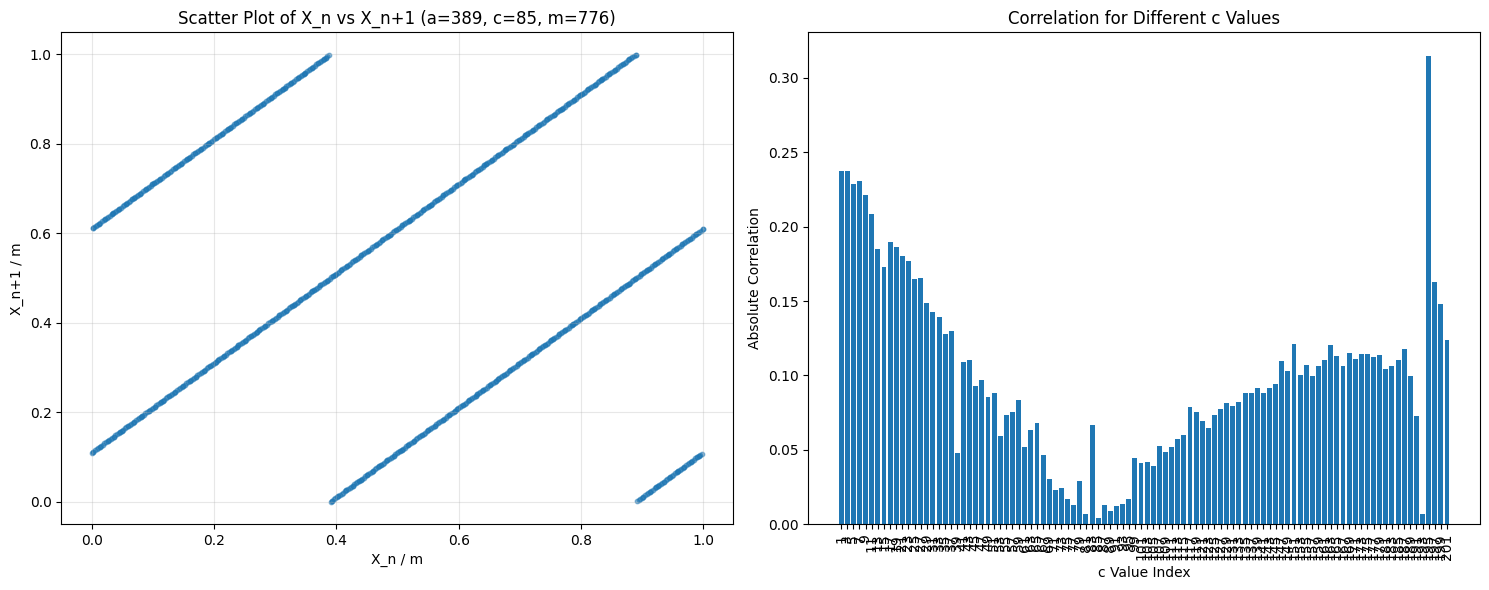

Vizualizacijos sukurtos ir išsaugotos.


In [1]:
import math
from math import gcd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_correlation(sequence, m, a, c, valid_c_values):
    """Plot correlation visualizations for the LCG sequence."""
    normalized = [x/m for x in sequence]
    
    plt.figure(figsize=(15, 6))
    
    # Scatter plot of consecutive values
    plt.subplot(1, 2, 1)
    plt.scatter(normalized[:-1], normalized[1:], alpha=0.5, s=10)
    plt.title(f'Scatter Plot of X_n vs X_n+1 (a={a}, c={c}, m={m})')
    plt.xlabel('X_n / m')
    plt.ylabel('X_n+1 / m')
    plt.grid(True, alpha=0.3)
    
    # Correlation bar chart for different c values
    plt.subplot(1, 2, 2)
    c_subset = valid_c_values[:100]  # First 100 valid c values
    correlations = [lag1_pearson(generate_lcg_sequence(a, c_val, m, 1), m) for c_val in c_subset]
    
    plt.bar(range(len(c_subset)), correlations)
    plt.title('Correlation for Different c Values')
    plt.xlabel('c Value Index')
    plt.ylabel('Absolute Correlation')
    plt.xticks(range(len(c_subset)), c_subset, rotation=90)
    
    plt.tight_layout()
    plt.savefig('lcg_correlation.png')
    plt.show()


def prime_factorization(n):
    """Find prime factorization of a number n."""
    factors = {}
    d = 2
    while d*d <= n:
        while n % d == 0:
            if d in factors:
                factors[d] += 1
            else:
                factors[d] = 1
            n //= d
        d += 1
    if n > 1:
        if n in factors:
            factors[n] += 1
        else:
            factors[n] = 1
    return factors

def find_power(a, m):
    """Find the power of the sequence (smallest s where (a-1)^s ≡ 0 mod m)."""
    b = a - 1
    s = 1
    result = b % m
    
    # Maximum iterations to prevent infinite loop
    max_iterations = m
    iterations = 0
    
    while result != 0 and iterations < max_iterations:
        result = (result * b) % m
        s += 1
        iterations += 1
    
    # If we didn't find a power that makes b^s ≡ 0 (mod m)
    if result != 0:
        return 0  # Return 0 instead of None to avoid formatting errors
    
    return s

def find_valid_c(m):
    """Find a valid increment 'c' for the LCG.
    
    For maximum period:
    - c must be relatively prime to m (gcd(c,m) = 1)
    - If m is a multiple of 4, c should be odd
    """
    valid_c_values = []
    
    for c in range(1, m):
        if gcd(c, m) == 1:
            # If m is divisible by 4, c should be odd
            if m % 4 == 0 and c % 2 == 0:
                continue
            valid_c_values.append(c)
    
    return valid_c_values

def generate_lcg_sequence(a, c, m, seed, length=1000):
    """Generate a sequence of random numbers using LCG."""
    sequence = [seed]
    x = seed
    
    for _ in range(length - 1):
        x = (a * x + c) % m
        sequence.append(x)
    
    return sequence

def calculate_correlation(sequence):
    """Calculate correlation between adjacent terms in the sequence."""
    # Normalize sequence to [0,1] range for proper statistical analysis
    normalized = [x / (len(sequence) - 1) for x in sequence]
    
    # Calculate correlation between consecutive terms
    x = normalized[:-1]  # All but the last element
    y = normalized[1:]   # All but the first element
    
    # Calculate Pearson correlation coefficient
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x)))
    denominator_x = sum((val - x_mean) ** 2 for val in x)
    denominator_y = sum((val - y_mean) ** 2 for val in y)
    
    # Avoid division by zero
    if denominator_x == 0 or denominator_y == 0:
        return 1.0  # Return high correlation if division by zero would occur
    
    correlation = numerator / (math.sqrt(denominator_x) * math.sqrt(denominator_y))
    
    # Return absolute value as we want minimum correlation regardless of direction
    return abs(correlation)

def test_c_correlation(a, m, valid_c_values, num_tests=50, seed=1):
    """Test different c values and find the one with minimal adjacent term correlation."""
    c_correlations = []
    
    for c in valid_c_values[:num_tests]:  # Test a subset of values to save time
        sequence = generate_lcg_sequence(a, c, m, seed)
        correlation = calculate_correlation(sequence)
        c_correlations.append((c, correlation))
    
    # Sort by correlation (lower is better)
    c_correlations.sort(key=lambda x: x[1])
    
    return c_correlations

import numpy as np

def lag1_pearson(sequence, m):
    """
    Pearsono koreliacija tarp X[n] ir X[n+1],
    normalizuota į [0,1] dalinant iš m.
    """
    arr = np.array(sequence) / m
    x, y = arr[:-1], arr[1:]
    return abs(np.corrcoef(x, y)[0, 1])

def main():
    # Given modulus
    m = 776  # 2^3 * 97
    
    print(f"Modulis m = {m} = 2^3 * 97")
    print("\nIeškome daugiklio 'a' su maksimaliu periodu ir galimgumu:")
    
    # Find all valid 'a' values
    valid_a_values = []
    
    # Print prime factorization for debugging
    print(f"Modulio m pirminiai daugikliai: {prime_factorization(m)}")
    
    for a in range(2, m):
        # Only check values where gcd(a,m) = 1
        if gcd(a, m) == 1:
            b = a - 1
            # Check if b satisfies our conditions
            # For m = 776 = 2^3 * 97:
            # b should be divisible by both 2 and 97
            # Also, since m is divisible by 8 (2^3), b should be divisible by 4
            if b % 2 == 0 and b % 97 == 0 and b % 4 == 0:
                power = find_power(a, m)
                valid_a_values.append((a, b, power))
                print(f"Patikrinta a={a}, b={b}, galingumas={power}")
    
    # Sort by power (larger is better)
    valid_a_values.sort(key=lambda x: x[2], reverse=True)
    
    # Print results
    if valid_a_values:
        print(f"\n{'Daugiklis a':<15}{'b=a-1':<15}{'Galingumas s':<15}")
        
        for a, b, power in valid_a_values[:10]:  # Show top 10 results
            print(f"{a:<15}{b:<15}{power:<15}")
        
        # Best result
        best_a, best_b, best_power = valid_a_values[0]
        print("\nGeriausias rezultatas:")
        print(f"Daugiklis a = {best_a}")
        print(f"b = a - 1 = {best_b}")
        print(f"Power s = {best_power}")
        
        # Verify the result
        print("\nPatikrinimas:")
        print(f"b^s mod m = {best_b}^{best_power} mod {m} = {pow(best_b, best_power, m)}")
        
        # Find valid c values
        valid_c_values = find_valid_c(m)
        
        # Test c values for correlation
        print("\nTiriame koreliacijas tarp gretimų narių skirtingoms c reikšmėms:")
        c_correlations = test_c_correlation(best_a, m, valid_c_values)
        
        print(f"\n{'c reikšmė':<15}{'Koreliacija':<15}")
        for c, corr in c_correlations[:10]:  # Show top 10 results
            print(f"{c:<15}{corr:.6f}")
        
        # Best c value (with minimal correlation)
        best_c, best_corr = c_correlations[0]
        
        print("\nMonte Carlo užduočiai rekomenduojama c reikšmė:")
        print(f"c = {best_c} (koreliacija: {best_corr:.6f})")
        
        print("\nPilni LCG parametrai:")
        print(f"a = {best_a}")
        print(f"c = {best_c}")
        print(f"m = {m}")
        print(f"LCG formulė: X_n+1 = ({best_a} * X_n + {best_c}) mod {m}")
        
        # Generate and display the first 10 pseudorandom numbers
        seed = 1  # Initial seed value
        sequence = generate_lcg_sequence(best_a, best_c, m, seed, length=10)
        
        print("\nPirmieji 10 sugeneruotų pseudoatsitiktinių skaičių:")
        print(f"{'n':<5}{'X_n':<8}{'X_n/m':<10}")
        for i, number in enumerate(sequence):
            normalized = number / m
            print(f"{i:<5}{number:<8}{normalized:.6f}")

        # Generate a longer sequence for visualization
        print("\nGeneruojamos vizualizacijos...")
        long_sequence = generate_lcg_sequence(best_a, best_c, m, seed, length=1000)
        
        # Create visualizations
        plot_correlation(long_sequence, m, best_a, best_c, valid_c_values)
        
        print("Vizualizacijos sukurtos ir išsaugotos.")


    else:
        print("Nerasta tinkamų daugiklio 'a' reikšmių.")

if __name__ == "__main__":
    main()